In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [70]:
train= pd.read_csv("train.csv").replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)
test= pd.read_csv("test.csv").replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2) 
train["Age"].fillna(train.Age.mean(), inplace=True) 
train["Embarked"].fillna(train.Embarked.mean(), inplace=True) 

In [71]:
combine1 = [train]

In [72]:
for train in combine1: 
        train['Salutation'] = train.Name.str.extract(' ([A-Za-z]+).', expand=False) 

In [73]:
for train in combine1: 
        train['Salutation'] = train['Salutation'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        train['Salutation'] = train['Salutation'].replace('Mlle', 'Miss')
        train['Salutation'] = train['Salutation'].replace('Ms', 'Miss')
        train['Salutation'] = train['Salutation'].replace('Mme', 'Mrs')
del train['Name']

In [74]:
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 

for train in combine1: 
        train['Salutation'] = train['Salutation'].map(Salutation_mapping) 
        train['Salutation'] = train['Salutation'].fillna(0) 

In [75]:
for train in combine1: 
        train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])
        train['Ticket_Lett'] = train['Ticket_Lett'].apply(lambda x: str(x)) 
        train['Ticket_Lett'] = np.where((train['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), train['Ticket_Lett'], np.where((train['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0')) 
        train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x)) 
        del train['Ticket'] 
    
train['Ticket_Lett']=train['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3) 

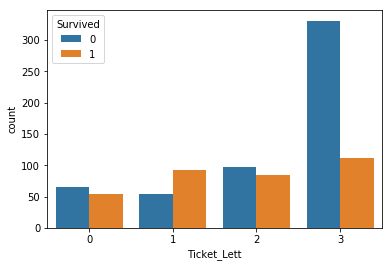

In [76]:
sns.countplot('Ticket_Lett',data=train,hue='Survived')

In [77]:
for train in combine1: 
    train['Cabin_Lett'] = train['Cabin'].apply(lambda x: str(x)[0]) 
    train['Cabin_Lett'] = train['Cabin_Lett'].apply(lambda x: str(x)) 
    train['Cabin_Lett'] = np.where((train['Cabin_Lett']).isin([ 'F', 'E', 'D', 'C', 'B', 'A']),train['Cabin_Lett'], np.where((train['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0'))
del train['Cabin'] 

In [78]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett
0,1,0,3,0,22.0,1,0,7.2500,0.0,1.0,3,9,0
1,2,1,1,1,38.0,1,0,71.2833,1.0,3.0,0,8,C
2,3,1,3,1,26.0,0,0,7.9250,0.0,2.0,3,16,0
3,4,1,1,1,35.0,1,0,53.1000,0.0,3.0,1,6,C
4,5,0,3,0,35.0,0,0,8.0500,0.0,1.0,3,6,0


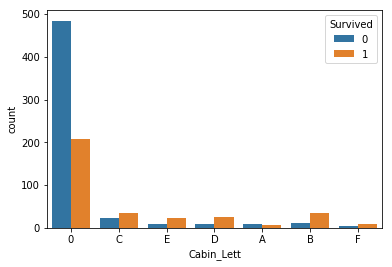

In [79]:
sns.countplot('Cabin_Lett',data=train,hue='Survived')

In [80]:
train['Cabin_Lett']=train['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1) 
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
for train in combine1:
    train['IsAlone'] = 0
    train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

In [81]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett,FamilySize,IsAlone
0,1,0,3,0,22.0,1,0,7.2500,0.0,1.0,3,9,0,2,0
1,2,1,1,1,38.0,1,0,71.2833,1.0,3.0,0,8,1,2,0
2,3,1,3,1,26.0,0,0,7.9250,0.0,2.0,3,16,0,1,1
3,4,1,1,1,35.0,1,0,53.1000,0.0,3.0,1,6,1,2,0
4,5,0,3,0,35.0,0,0,8.0500,0.0,1.0,3,6,0,1,1


In [82]:
train_data = train.values

In [83]:
train_data

array([[  1.,   0.,   3., ...,   0.,   2.,   0.],
       [  2.,   1.,   1., ...,   1.,   2.,   0.],
       [  3.,   1.,   3., ...,   0.,   1.,   1.],
       ...,
       [889.,   0.,   3., ...,   0.,   4.,   0.],
       [890.,   1.,   1., ...,   1.,   1.,   1.],
       [891.,   0.,   3., ...,   0.,   1.,   1.]])

In [84]:
xs = train_data[:, 2:] # Pclass以降の変数
y  = train_data[:, 1]  # 正解データ

In [85]:
test["Age"].fillna(train.Age.mean(), inplace=True)
test["Fare"].fillna(train.Fare.mean(), inplace=True)

In [86]:
combine = [test]
for test in combine:
    test['Salutation'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
for test in combine:
    test['Salutation'] = test['Salutation'].replace(['Lady', 'Countess','Capt', 'Col',\
         'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    test['Salutation'] = test['Salutation'].replace('Mlle', 'Miss')
    test['Salutation'] = test['Salutation'].replace('Ms', 'Miss')
    test['Salutation'] = test['Salutation'].replace('Mme', 'Mrs')
    del test['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for test in combine:
    test['Salutation'] = test['Salutation'].map(Salutation_mapping)
    test['Salutation'] = test['Salutation'].fillna(0)

for test in combine:
        test['Ticket_Lett'] = test['Ticket'].apply(lambda x: str(x)[0])
        test['Ticket_Lett'] = test['Ticket_Lett'].apply(lambda x: str(x))
        test['Ticket_Lett'] = np.where((test['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), test['Ticket_Lett'],
                                   np.where((test['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0', '0'))
        test['Ticket_Len'] = test['Ticket'].apply(lambda x: len(x))
        del test['Ticket']
test['Ticket_Lett']=test['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3) 

for test in combine:
        test['Cabin_Lett'] = test['Cabin'].apply(lambda x: str(x)[0])
        test['Cabin_Lett'] = test['Cabin_Lett'].apply(lambda x: str(x))
        test['Cabin_Lett'] = np.where((test['Cabin_Lett']).isin(['T', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']),test['Cabin_Lett'],
                                   np.where((test['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0','0'))        
        del test['Cabin']
test['Cabin_Lett']=test['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1).replace("G",1) 
test["FamilySize"] = train["SibSp"] + train["Parch"] + 1

for test in combine:
    test['IsAlone'] = 0
    test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1
    
test_data = test.values
xs_test = test_data[:, 1:]

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
random_forest=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=4,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

random_forest.fit(xs, y)
Y_pred = random_forest.predict(xs_test)

In [89]:
Y_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [93]:

Y_pred = Y_pred.astype(int)
# PassengerIdを取得
PassengerId = np.array(test["PassengerId"]).astype(int)
 
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(Y_pred, PassengerId,columns = ['Survived'])

# my_tree_one.csvとして書き出し
my_solution.to_csv("my_randomforest_0304-01.csv", index_label = ["PassengerId"])

In [94]:
ex = pd.read_csv('my_randomforest_0304-01.csv')

In [101]:
test["Survived"]=ex["Survived"]

In [102]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett,FamilySize,IsAlone,Survived
0,892,3,0,34.5,0,0,7.8292,2,1,3,6,0,2,0,0
1,893,3,1,47.0,1,0,7.0000,0,3,3,6,0,2,0,0
2,894,2,0,62.0,0,0,9.6875,2,1,2,6,0,1,1,0
3,895,3,0,27.0,0,0,8.6625,0,1,3,6,0,2,0,0
4,896,3,1,22.0,1,1,12.2875,0,3,3,7,0,1,1,1


In [103]:
train=train.append(test, ignore_index=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [104]:
train.head()

,Age,Cabin_Lett,Embarked,FamilySize,Fare,IsAlone,Parch,PassengerId,Pclass,Salutation,Sex,SibSp,Survived,Ticket_Len,Ticket_Lett
0,22.0,0,0.0,2,7.2500,0,0,1,3,1.0,0,1,0,9,3
1,38.0,1,1.0,2,71.2833,0,0,2,1,3.0,1,1,1,8,0
2,26.0,0,0.0,1,7.9250,1,0,3,3,2.0,1,0,1,16,3
3,35.0,1,0.0,2,53.1000,0,0,4,1,3.0,1,1,1,6,1
4,35.0,0,0.0,1,8.0500,1,0,5,3,1.0,0,0,0,6,3


In [105]:
train = train.ix[:,[7,12,8,10,0,11,6,4,2,9,14,13,1,3,5]]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [108]:
len(train)

1309

In [109]:
train_data = train.values

In [110]:
xs = train_data[:, 2:] # Pclass以降の変数
y  = train_data[:, 1]  # 正解データ
test_data = test.values
xs_test = test_data[:, 1:]

In [116]:
import lightgbm as lgb
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(xs,y,test_size=0.008,random_state=0)

lgb_train = lgb.Dataset(np.array(X_train),np.array(y_train))
lgb_eval = lgb.Dataset(np.array(X_test),np.array(y_test),reference=lgb_train)
 

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2'},
    'num_leaves': 200,
    'learning_rate': 0.003,
    #'num_iterations':100,
    'feature_fraction': 0.52,
    'bagging_fraction': 0.79,
    'bagging_freq': 7,
    'verbose': 0
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=5000,
                valid_sets=lgb_eval,
                early_stopping_rounds=1000)
X_pred= gbm.predict(np.array(xs_test), num_iteration=gbm.best_iteration)

[1]	valid_0's l2: 0.253978
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's l2: 0.252864
[3]	valid_0's l2: 0.251834
[4]	valid_0's l2: 0.251476
[5]	valid_0's l2: 0.250455
[6]	valid_0's l2: 0.250153
[7]	valid_0's l2: 0.249783
[8]	valid_0's l2: 0.24887
[9]	valid_0's l2: 0.247796
[10]	valid_0's l2: 0.247421
[11]	valid_0's l2: 0.246317
[12]	valid_0's l2: 0.245374
[13]	valid_0's l2: 0.244198
[14]	valid_0's l2: 0.243035
[15]	valid_0's l2: 0.242491
[16]	valid_0's l2: 0.241513
[17]	valid_0's l2: 0.240441
[18]	valid_0's l2: 0.239917
[19]	valid_0's l2: 0.238721
[20]	valid_0's l2: 0.238199
[21]	valid_0's l2: 0.237933
[22]	valid_0's l2: 0.237553
[23]	valid_0's l2: 0.236391
[24]	valid_0's l2: 0.235267
[25]	valid_0's l2: 0.234187
[26]	valid_0's l2: 0.233143
[27]	valid_0's l2: 0.231918
[28]	valid_0's l2: 0.230794
[29]	valid_0's l2: 0.23052
[30]	valid_0's l2: 0.229594
[31]	valid_0's l2: 0.229242
[32]	valid_0's l2: 0.2282
[33]	valid_0's l2: 0.227163
[34]	valid_0's l2: 0.2264

[323]	valid_0's l2: 0.0935909
[324]	valid_0's l2: 0.0935391
[325]	valid_0's l2: 0.0933668
[326]	valid_0's l2: 0.0931339
[327]	valid_0's l2: 0.0930931
[328]	valid_0's l2: 0.0927292
[329]	valid_0's l2: 0.0924458
[330]	valid_0's l2: 0.0921536
[331]	valid_0's l2: 0.0918654
[332]	valid_0's l2: 0.0915526
[333]	valid_0's l2: 0.0911985
[334]	valid_0's l2: 0.0908648
[335]	valid_0's l2: 0.0908138
[336]	valid_0's l2: 0.0905331
[337]	valid_0's l2: 0.0902656
[338]	valid_0's l2: 0.0899915
[339]	valid_0's l2: 0.0898555
[340]	valid_0's l2: 0.0895588
[341]	valid_0's l2: 0.0892673
[342]	valid_0's l2: 0.0891481
[343]	valid_0's l2: 0.0888291
[344]	valid_0's l2: 0.0887136
[345]	valid_0's l2: 0.0885982
[346]	valid_0's l2: 0.0884068
[347]	valid_0's l2: 0.0881502
[348]	valid_0's l2: 0.0879682
[349]	valid_0's l2: 0.0877872
[350]	valid_0's l2: 0.0874981
[351]	valid_0's l2: 0.0872087
[352]	valid_0's l2: 0.0868231
[353]	valid_0's l2: 0.0865957
[354]	valid_0's l2: 0.0863106
[355]	valid_0's l2: 0.0860298
[356]	vali

[687]	valid_0's l2: 0.0441742
[688]	valid_0's l2: 0.0441542
[689]	valid_0's l2: 0.0440591
[690]	valid_0's l2: 0.044004
[691]	valid_0's l2: 0.043962
[692]	valid_0's l2: 0.0439259
[693]	valid_0's l2: 0.0438667
[694]	valid_0's l2: 0.0437435
[695]	valid_0's l2: 0.0436656
[696]	valid_0's l2: 0.0435301
[697]	valid_0's l2: 0.0434506
[698]	valid_0's l2: 0.0433889
[699]	valid_0's l2: 0.0432936
[700]	valid_0's l2: 0.0432439
[701]	valid_0's l2: 0.0431603
[702]	valid_0's l2: 0.0430963
[703]	valid_0's l2: 0.0430329
[704]	valid_0's l2: 0.0429575
[705]	valid_0's l2: 0.0429015
[706]	valid_0's l2: 0.0428299
[707]	valid_0's l2: 0.0427498
[708]	valid_0's l2: 0.042676
[709]	valid_0's l2: 0.0426322
[710]	valid_0's l2: 0.0425814
[711]	valid_0's l2: 0.0424592
[712]	valid_0's l2: 0.0424162
[713]	valid_0's l2: 0.0423696
[714]	valid_0's l2: 0.0422842
[715]	valid_0's l2: 0.0422395
[716]	valid_0's l2: 0.0420945
[717]	valid_0's l2: 0.0420363
[718]	valid_0's l2: 0.0418945
[719]	valid_0's l2: 0.0418151
[720]	valid_0

[1071]	valid_0's l2: 0.0294265
[1072]	valid_0's l2: 0.0293909
[1073]	valid_0's l2: 0.0293691
[1074]	valid_0's l2: 0.0293582
[1075]	valid_0's l2: 0.0292877
[1076]	valid_0's l2: 0.0292552
[1077]	valid_0's l2: 0.0291865
[1078]	valid_0's l2: 0.0291379
[1079]	valid_0's l2: 0.0291168
[1080]	valid_0's l2: 0.0290806
[1081]	valid_0's l2: 0.0290882
[1082]	valid_0's l2: 0.0290803
[1083]	valid_0's l2: 0.0290364
[1084]	valid_0's l2: 0.0290374
[1085]	valid_0's l2: 0.0290347
[1086]	valid_0's l2: 0.0290884
[1087]	valid_0's l2: 0.0290424
[1088]	valid_0's l2: 0.0290334
[1089]	valid_0's l2: 0.029016
[1090]	valid_0's l2: 0.0289722
[1091]	valid_0's l2: 0.0289766
[1092]	valid_0's l2: 0.0289596
[1093]	valid_0's l2: 0.0289633
[1094]	valid_0's l2: 0.0289104
[1095]	valid_0's l2: 0.0288995
[1096]	valid_0's l2: 0.0288355
[1097]	valid_0's l2: 0.02883
[1098]	valid_0's l2: 0.0288095
[1099]	valid_0's l2: 0.0287999
[1100]	valid_0's l2: 0.0287951
[1101]	valid_0's l2: 0.0287829
[1102]	valid_0's l2: 0.0287844
[1103]	vali

[1434]	valid_0's l2: 0.0237353
[1435]	valid_0's l2: 0.0237106
[1436]	valid_0's l2: 0.0236905
[1437]	valid_0's l2: 0.0236604
[1438]	valid_0's l2: 0.0236731
[1439]	valid_0's l2: 0.0236574
[1440]	valid_0's l2: 0.0236576
[1441]	valid_0's l2: 0.0236655
[1442]	valid_0's l2: 0.0236658
[1443]	valid_0's l2: 0.023702
[1444]	valid_0's l2: 0.0237151
[1445]	valid_0's l2: 0.0237133
[1446]	valid_0's l2: 0.0237025
[1447]	valid_0's l2: 0.0236985
[1448]	valid_0's l2: 0.0236993
[1449]	valid_0's l2: 0.0236848
[1450]	valid_0's l2: 0.023658
[1451]	valid_0's l2: 0.0236372
[1452]	valid_0's l2: 0.0236149
[1453]	valid_0's l2: 0.0236081
[1454]	valid_0's l2: 0.023585
[1455]	valid_0's l2: 0.0235731
[1456]	valid_0's l2: 0.0235736
[1457]	valid_0's l2: 0.023581
[1458]	valid_0's l2: 0.0235351
[1459]	valid_0's l2: 0.0235175
[1460]	valid_0's l2: 0.0234956
[1461]	valid_0's l2: 0.0234688
[1462]	valid_0's l2: 0.0234174
[1463]	valid_0's l2: 0.0233941
[1464]	valid_0's l2: 0.0233625
[1465]	valid_0's l2: 0.0233502
[1466]	valid

[1794]	valid_0's l2: 0.0213586
[1795]	valid_0's l2: 0.0213379
[1796]	valid_0's l2: 0.0213067
[1797]	valid_0's l2: 0.0212833
[1798]	valid_0's l2: 0.0212836
[1799]	valid_0's l2: 0.0212467
[1800]	valid_0's l2: 0.0212688
[1801]	valid_0's l2: 0.0212839
[1802]	valid_0's l2: 0.0212911
[1803]	valid_0's l2: 0.0213062
[1804]	valid_0's l2: 0.0213003
[1805]	valid_0's l2: 0.021286
[1806]	valid_0's l2: 0.0212998
[1807]	valid_0's l2: 0.0212673
[1808]	valid_0's l2: 0.0212737
[1809]	valid_0's l2: 0.0212639
[1810]	valid_0's l2: 0.0212326
[1811]	valid_0's l2: 0.0211895
[1812]	valid_0's l2: 0.0211804
[1813]	valid_0's l2: 0.0211723
[1814]	valid_0's l2: 0.0211729
[1815]	valid_0's l2: 0.0211557
[1816]	valid_0's l2: 0.0211406
[1817]	valid_0's l2: 0.0210982
[1818]	valid_0's l2: 0.0210887
[1819]	valid_0's l2: 0.0210625
[1820]	valid_0's l2: 0.0210456
[1821]	valid_0's l2: 0.0210488
[1822]	valid_0's l2: 0.0210609
[1823]	valid_0's l2: 0.0210652
[1824]	valid_0's l2: 0.0210687
[1825]	valid_0's l2: 0.0210536
[1826]	va

[2191]	valid_0's l2: 0.0189882
[2192]	valid_0's l2: 0.0189551
[2193]	valid_0's l2: 0.0189326
[2194]	valid_0's l2: 0.0189222
[2195]	valid_0's l2: 0.0189011
[2196]	valid_0's l2: 0.0188868
[2197]	valid_0's l2: 0.0188736
[2198]	valid_0's l2: 0.0188715
[2199]	valid_0's l2: 0.0188623
[2200]	valid_0's l2: 0.0188643
[2201]	valid_0's l2: 0.018869
[2202]	valid_0's l2: 0.0188633
[2203]	valid_0's l2: 0.0188712
[2204]	valid_0's l2: 0.0188754
[2205]	valid_0's l2: 0.0188609
[2206]	valid_0's l2: 0.018862
[2207]	valid_0's l2: 0.0188677
[2208]	valid_0's l2: 0.018862
[2209]	valid_0's l2: 0.0188971
[2210]	valid_0's l2: 0.0189053
[2211]	valid_0's l2: 0.0189221
[2212]	valid_0's l2: 0.0189427
[2213]	valid_0's l2: 0.0189354
[2214]	valid_0's l2: 0.0189239
[2215]	valid_0's l2: 0.0189021
[2216]	valid_0's l2: 0.0188646
[2217]	valid_0's l2: 0.0188346
[2218]	valid_0's l2: 0.0188407
[2219]	valid_0's l2: 0.0188322
[2220]	valid_0's l2: 0.0188478
[2221]	valid_0's l2: 0.0188444
[2222]	valid_0's l2: 0.0188683
[2223]	vali

[2596]	valid_0's l2: 0.0175535
[2597]	valid_0's l2: 0.0175547
[2598]	valid_0's l2: 0.0175514
[2599]	valid_0's l2: 0.0175436
[2600]	valid_0's l2: 0.0175375
[2601]	valid_0's l2: 0.0175201
[2602]	valid_0's l2: 0.0175058
[2603]	valid_0's l2: 0.0174911
[2604]	valid_0's l2: 0.0174739
[2605]	valid_0's l2: 0.0174995
[2606]	valid_0's l2: 0.0174899
[2607]	valid_0's l2: 0.0175221
[2608]	valid_0's l2: 0.0175135
[2609]	valid_0's l2: 0.0175179
[2610]	valid_0's l2: 0.0175169
[2611]	valid_0's l2: 0.017527
[2612]	valid_0's l2: 0.0175329
[2613]	valid_0's l2: 0.017529
[2614]	valid_0's l2: 0.017518
[2615]	valid_0's l2: 0.0175043
[2616]	valid_0's l2: 0.0174801
[2617]	valid_0's l2: 0.0174678
[2618]	valid_0's l2: 0.0174574
[2619]	valid_0's l2: 0.0174644
[2620]	valid_0's l2: 0.0174635
[2621]	valid_0's l2: 0.0174778
[2622]	valid_0's l2: 0.017487
[2623]	valid_0's l2: 0.0174777
[2624]	valid_0's l2: 0.0174756
[2625]	valid_0's l2: 0.017466
[2626]	valid_0's l2: 0.017469
[2627]	valid_0's l2: 0.0174609
[2628]	valid_0

[3006]	valid_0's l2: 0.0163285
[3007]	valid_0's l2: 0.0163263
[3008]	valid_0's l2: 0.0163244
[3009]	valid_0's l2: 0.0163406
[3010]	valid_0's l2: 0.0163319
[3011]	valid_0's l2: 0.0163274
[3012]	valid_0's l2: 0.0163168
[3013]	valid_0's l2: 0.0163237
[3014]	valid_0's l2: 0.0163257
[3015]	valid_0's l2: 0.0163178
[3016]	valid_0's l2: 0.0163126
[3017]	valid_0's l2: 0.0163023
[3018]	valid_0's l2: 0.0163014
[3019]	valid_0's l2: 0.0163165
[3020]	valid_0's l2: 0.0162931
[3021]	valid_0's l2: 0.0162805
[3022]	valid_0's l2: 0.0162663
[3023]	valid_0's l2: 0.0162643
[3024]	valid_0's l2: 0.016259
[3025]	valid_0's l2: 0.0162547
[3026]	valid_0's l2: 0.0162696
[3027]	valid_0's l2: 0.0162737
[3028]	valid_0's l2: 0.0162783
[3029]	valid_0's l2: 0.0162735
[3030]	valid_0's l2: 0.0162731
[3031]	valid_0's l2: 0.0162756
[3032]	valid_0's l2: 0.0162765
[3033]	valid_0's l2: 0.0162679
[3034]	valid_0's l2: 0.0162555
[3035]	valid_0's l2: 0.0162473
[3036]	valid_0's l2: 0.0162519
[3037]	valid_0's l2: 0.0162624
[3038]	va

[3421]	valid_0's l2: 0.0160928
[3422]	valid_0's l2: 0.0161113
[3423]	valid_0's l2: 0.0161177
[3424]	valid_0's l2: 0.0161234
[3425]	valid_0's l2: 0.0161264
[3426]	valid_0's l2: 0.016148
[3427]	valid_0's l2: 0.0161532
[3428]	valid_0's l2: 0.0161585
[3429]	valid_0's l2: 0.0161632
[3430]	valid_0's l2: 0.0161653
[3431]	valid_0's l2: 0.0161532
[3432]	valid_0's l2: 0.0161595
[3433]	valid_0's l2: 0.0161474
[3434]	valid_0's l2: 0.0161402
[3435]	valid_0's l2: 0.0161307
[3436]	valid_0's l2: 0.0161293
[3437]	valid_0's l2: 0.0161318
[3438]	valid_0's l2: 0.0161313
[3439]	valid_0's l2: 0.0161298
[3440]	valid_0's l2: 0.0161425
[3441]	valid_0's l2: 0.0161159
[3442]	valid_0's l2: 0.0161092
[3443]	valid_0's l2: 0.0161031
[3444]	valid_0's l2: 0.0161093
[3445]	valid_0's l2: 0.0161046
[3446]	valid_0's l2: 0.0161011
[3447]	valid_0's l2: 0.0161105
[3448]	valid_0's l2: 0.0161254
[3449]	valid_0's l2: 0.0161262
[3450]	valid_0's l2: 0.0161238
[3451]	valid_0's l2: 0.0161233
[3452]	valid_0's l2: 0.0161251
[3453]	va

[3838]	valid_0's l2: 0.0161218
[3839]	valid_0's l2: 0.0161297
[3840]	valid_0's l2: 0.0161235
[3841]	valid_0's l2: 0.016141
[3842]	valid_0's l2: 0.0161596
[3843]	valid_0's l2: 0.0161656
[3844]	valid_0's l2: 0.0161657
[3845]	valid_0's l2: 0.0161678
[3846]	valid_0's l2: 0.0161435
[3847]	valid_0's l2: 0.0161296
[3848]	valid_0's l2: 0.0161038
[3849]	valid_0's l2: 0.0160894
[3850]	valid_0's l2: 0.016103
[3851]	valid_0's l2: 0.0160973
[3852]	valid_0's l2: 0.0160748
[3853]	valid_0's l2: 0.0160655
[3854]	valid_0's l2: 0.0160682
[3855]	valid_0's l2: 0.0160814
[3856]	valid_0's l2: 0.0160659
[3857]	valid_0's l2: 0.0160667
[3858]	valid_0's l2: 0.0160712
[3859]	valid_0's l2: 0.0160713
[3860]	valid_0's l2: 0.0160708
[3861]	valid_0's l2: 0.0160785
[3862]	valid_0's l2: 0.0160754
[3863]	valid_0's l2: 0.0160734
[3864]	valid_0's l2: 0.0160617
[3865]	valid_0's l2: 0.0160646
[3866]	valid_0's l2: 0.016057
[3867]	valid_0's l2: 0.016044
[3868]	valid_0's l2: 0.0160358
[3869]	valid_0's l2: 0.016032
[3870]	valid_

[4245]	valid_0's l2: 0.015391
[4246]	valid_0's l2: 0.0153892
[4247]	valid_0's l2: 0.015398
[4248]	valid_0's l2: 0.0153968
[4249]	valid_0's l2: 0.0153918
[4250]	valid_0's l2: 0.0154089
[4251]	valid_0's l2: 0.0154041
[4252]	valid_0's l2: 0.0154111
[4253]	valid_0's l2: 0.0154221
[4254]	valid_0's l2: 0.0154266
[4255]	valid_0's l2: 0.0154208
[4256]	valid_0's l2: 0.0154136
[4257]	valid_0's l2: 0.0154158
[4258]	valid_0's l2: 0.0154151
[4259]	valid_0's l2: 0.0154168
[4260]	valid_0's l2: 0.0154182
[4261]	valid_0's l2: 0.0154091
[4262]	valid_0's l2: 0.0154089
[4263]	valid_0's l2: 0.0153987
[4264]	valid_0's l2: 0.0154074
[4265]	valid_0's l2: 0.0154174
[4266]	valid_0's l2: 0.0154093
[4267]	valid_0's l2: 0.0154149
[4268]	valid_0's l2: 0.0154194
[4269]	valid_0's l2: 0.015422
[4270]	valid_0's l2: 0.0154321
[4271]	valid_0's l2: 0.015417
[4272]	valid_0's l2: 0.0154171
[4273]	valid_0's l2: 0.015416
[4274]	valid_0's l2: 0.015418
[4275]	valid_0's l2: 0.0154269
[4276]	valid_0's l2: 0.0154234
[4277]	valid_0

[4649]	valid_0's l2: 0.0153372
[4650]	valid_0's l2: 0.0153354
[4651]	valid_0's l2: 0.0153264
[4652]	valid_0's l2: 0.0153429
[4653]	valid_0's l2: 0.0153523
[4654]	valid_0's l2: 0.0153618
[4655]	valid_0's l2: 0.0153699
[4656]	valid_0's l2: 0.0153769
[4657]	valid_0's l2: 0.0153779
[4658]	valid_0's l2: 0.0153832
[4659]	valid_0's l2: 0.0153947
[4660]	valid_0's l2: 0.0153763
[4661]	valid_0's l2: 0.0153821
[4662]	valid_0's l2: 0.0153816
[4663]	valid_0's l2: 0.0153742
[4664]	valid_0's l2: 0.0153676
[4665]	valid_0's l2: 0.0153557
[4666]	valid_0's l2: 0.0153574
[4667]	valid_0's l2: 0.0153561
[4668]	valid_0's l2: 0.01537
[4669]	valid_0's l2: 0.0153809
[4670]	valid_0's l2: 0.0153828
[4671]	valid_0's l2: 0.0153819
[4672]	valid_0's l2: 0.0153874
[4673]	valid_0's l2: 0.0153917
[4674]	valid_0's l2: 0.0153886
[4675]	valid_0's l2: 0.0153905
[4676]	valid_0's l2: 0.0153963
[4677]	valid_0's l2: 0.0154037
[4678]	valid_0's l2: 0.0154143
[4679]	valid_0's l2: 0.0154232
[4680]	valid_0's l2: 0.0154275
[4681]	val

In [117]:
X_pred

array([-0.02284262,  0.2704846 ,  0.05120037,  0.10663813,  1.03083731,
        0.0997858 ,  0.71227576, -0.05339706,  0.81344929, -0.0231467 ,
       -0.07806918,  0.03497584,  1.10210498,  0.08413411,  0.8954054 ,
        1.02547094, -0.073123  ,  0.20002315,  0.25928048,  0.76061156,
       -0.01847534,  0.84109801,  1.01484521,  0.13166349,  0.94728501,
       -0.0393424 ,  1.03869217,  0.04076697,  0.41717053,  0.09745643,
       -0.03927852,  0.03903535,  0.88539234,  0.64338991,  0.77093353,
        0.0409518 ,  0.11900298,  0.06703536, -0.00958327,  0.27591857,
        0.01169484,  0.2498267 ,  0.23423954,  0.95638074,  1.04344182,
        0.17979905, -0.01361515,  0.11052007,  0.99476385,  0.89097996,
        0.86260418,  0.12500847,  1.06768718,  0.79201943,  0.00814129,
        0.0182832 , -0.00386069,  0.05426352,  0.03438359,  1.107872  ,
       -0.02715812,  0.21674228, -0.01235299,  0.35686643,  0.89012173,
        0.92942241,  0.84256751, -0.09128001,  0.23044799,  0.97

In [118]:
for i in range(418):
    if X_pred[i]>=0.51:
        X_pred[i]=1
    else:
        X_pred[i]=0

In [119]:
X_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [120]:
X_pred = X_pred.astype(int)
# PassengerIdを取得
PassengerId = np.array(test["PassengerId"]).astype(int)
 
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(X_pred, PassengerId,columns = ['Survived'])

# my_tree_one.csvとして書き出し
my_solution.to_csv("my_randomforest_0304-02.csv", index_label = ["PassengerId"])

0.028926125244618395